- ## ****Support Vector Machine****
   - ### ****Support Vector Machine (SVM) was implemented to find the optimal hyperplane that maximizes the margin between classes. We explore two variations: Linear SVM, which assumes the data is linearly separable, and Kernel SVM (RBF), which projects the data into a higher-dimensional space to capture non-linear patterns. However, SVM has significant computational limits: its training complexity is $O(N^2)$ to $O(N^3)$ relative to the number of samples ($N$). This means that doubling the data can increase the processing time and RAM usage by 4 to 8 times, making it extremely difficult to scale to the full Instacart dataset without significant subsampling****
   - ### ****The decision to use Subsampling was driven by the computational limits of SVM. Mathematically, SVM training complexity scales between $O(n^2)$ and $O(n^3)$ relative to the number of samples. For the Instacart dataset, using the full data would lead to a Memory Overflow and impractical training times. By utilizing a stratified random sample, we ensured that the model captures the essential feature distributions and decision boundaries while remaining within the hardware's RAM and CPU constraints****

In [ ]:
from sklearn.svm import SVC
import gc

gc.collect()
X_train_svm = X_train_scaled[:8000]
y_train_svm = y_train[:8000]

- ## ****Linear SVM****
   -  ### ****Overall Performance: The model demonstrates strong discriminative power with an ROC-AUC of 0.8679, indicating an 87% probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one****

- ## ****Metric Breakdown****
   - ### ****Recall (0.9255) - The Strong Point: The model successfully identified 92.5% of all actual "Reorder" cases. This high sensitivity ensures that very few potential recurring customers are missed****
   -  ### ****Precision (0.1302) - The Weak Point: The precision is quite low, meaning that out of all predicted reorders, only 13% were actually correct. This results in a high number of False Positives****
   -  ### ****F1-Score (0.2283): Due to the significant imbalance between Precision and Recall, the F1-score is relatively low, reflecting the trade-off made to achieve high sensitivity****
   -  ### ****MCC (0.2785): The positive Matthews Correlation Coefficient indicates the model performs better than random guessing, though there is substantial room for improvement in classification accuracy****


--- Linear SVM Performance Metrics ---
Accuracy              : 0.7060
Precision             : 0.1302
Recall                : 0.9255
F1-score              : 0.2283
MCC                   : 0.2785
ROC-AUC               : 0.8679
Avg Precision (AP)    : 0.2352


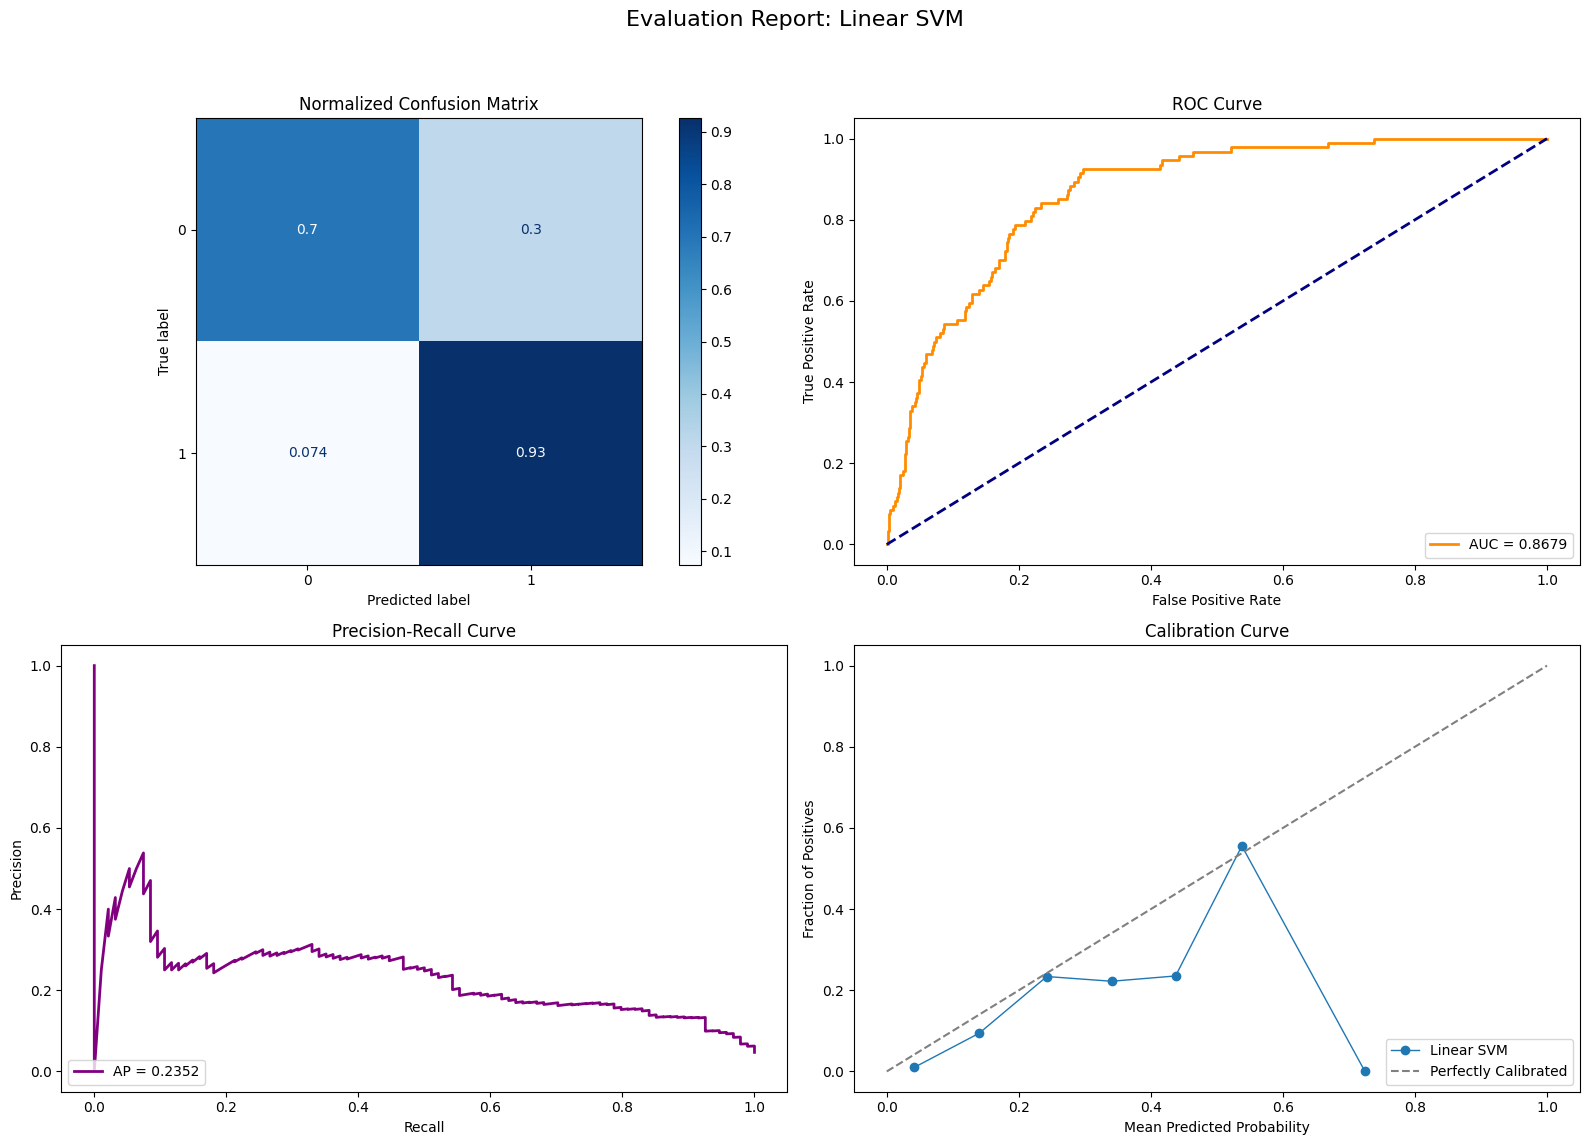

{'Accuracy': 0.706,
 'Precision': 0.13023952095808383,
 'Recall': 0.925531914893617,
 'F1-score': 0.2283464566929134,
 'MCC': np.float64(0.27852893060961176),
 'ROC-AUC': np.float64(0.8679254761001094),
 'Avg Precision (AP)': np.float64(0.23521108042812708)}

In [ ]:
svc_linear = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svc_linear.fit(X_train_svm, y_train_svm)
evaluate_model(svc_linear, X_val_scaled[:2000], y_val[:2000], model_name="Linear SVM")

- ## ****Kernel SVM****
   - ### ****Overall Performance: The Kernel SVM model using the Radial Basis Function (RBF) kernel achieved an overall Accuracy of 80.75%. While the accuracy is high, a deeper look at the metrics reveals a significant trade-off in classification performance, particularly in precision and recall****

- ## ****Metric Breakdown****
   - ### ****ROC-AUC (0.7849): The model shows a good ability to distinguish between classes (approx. 78%), though it is lower than the Linear SVM's performance (0.8679)****
   -  ### ****Recall (0.4574): The model correctly identified only 45.7% of actual "Reorder" cases. This is a substantial drop compared to the Linear model, meaning it misses more than half of the target customers****
   -  ### ****Precision (0.1141): The precision remains low, with only 11.4% of predicted reorders being correct. This indicates a high rate of False Positives.****
   -  ### ****F1-Score (0.1826) & MCC (0.1527): Both scores are low, suggesting that the model struggles to balance precision and recall effectively on this imbalanced dataset****


--- Kernel SVM (RBF) Performance Metrics ---
Accuracy              : 0.8075
Precision             : 0.1141
Recall                : 0.4574
F1-score              : 0.1826
MCC                   : 0.1527
ROC-AUC               : 0.7849
Avg Precision (AP)    : 0.1238


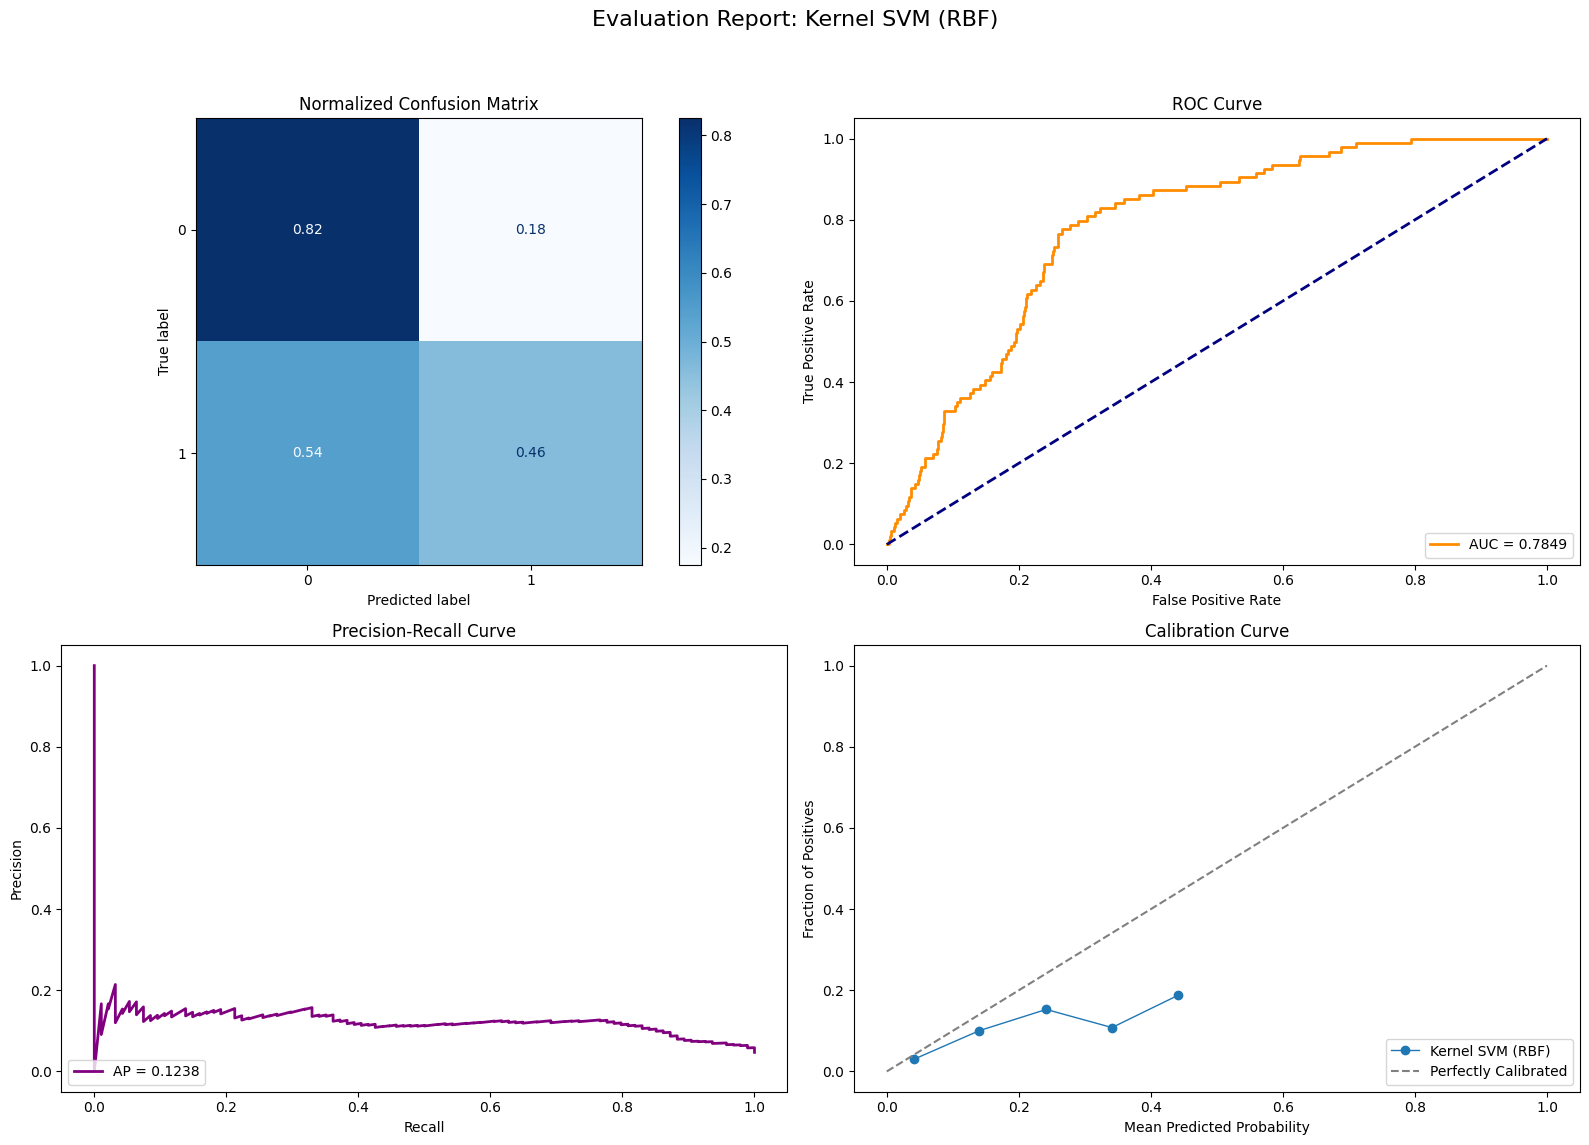

{'Accuracy': 0.8075,
 'Precision': 0.11405835543766578,
 'Recall': 0.4574468085106383,
 'F1-score': 0.18259023354564755,
 'MCC': np.float64(0.15271051238781835),
 'ROC-AUC': np.float64(0.7849009845727937),
 'Avg Precision (AP)': np.float64(0.1238465691919698)}

In [ ]:
svc_kernel = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svc_kernel.fit(X_train_svm, y_train_svm)
evaluate_model(svc_kernel, X_val_scaled[:2000], y_val[:2000], model_name="Kernel SVM (RBF)")